In [172]:
!pip3 install ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [173]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [174]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from ann_visualizer.visualize import ann_viz;
%matplotlib inline

#visualizing model
import tensorflow as tf
tf.keras.utils.plot_model
from keras.utils.vis_utils import plot_model

from keras.layers import LSTM
from keras.layers import Dropout

# scaling and train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# creating a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam


# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

#used to read and set the model learning parameters
from keras import backend as K


**CONNECTING TO GOOGLE DRIVE TO ACCESS DATASET**

In [175]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Acquire data**
Store dataset into into Pandas DataFrames.

In [176]:
df = pd.read_csv('/content/drive/MyDrive/fpp22.csv')


In [177]:
df

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
0,1,1,1,4,85,12,2700,253,52,305,34,302,1
1,2,2,0,0,86,4,2701,197,124,321,33,315,1
2,3,3,4,4,85,1,2702,40,60,100,18,83,1
3,4,4,0,0,86,5,2703,200,119,319,30,303,1
4,5,5,0,0,86,4,2704,140,94,234,24,208,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,2496,3,2,83,15,5195,708,287,1370,49,682,4
2496,2497,2497,2,2,83,22,5196,400,162,919,61,714,3
2497,2498,2498,2,2,83,14,5197,881,271,1013,62,766,3
2498,2499,2499,2,2,83,14,5198,794,240,965,30,530,3


### **Display the dataset contents first five rows and last five rows to check its contents are stored in dataframe or not**

In [178]:
df.head(4)

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
0,1,1,1,4,85,12,2700,253,52,305,34,302,1
1,2,2,0,0,86,4,2701,197,124,321,33,315,1
2,3,3,4,4,85,1,2702,40,60,100,18,83,1
3,4,4,0,0,86,5,2703,200,119,319,30,303,1


In [179]:
# preview the data
df.tail(3)

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
2497,2498,2498,2,2,83,14,5197,881,271,1013,62,766,3
2498,2499,2499,2,2,83,14,5198,794,240,965,30,530,3
2499,2500,2500,1,1,84,21,5199,142,245,654,34,785,3


**Display the attributes name of dataset**

In [180]:
print(df.columns.values)


['id' 'Project' 'TeamExp' 'ManagerExp' 'YearEnd' 'Length' 'Effort'
 'Transactions' 'Entities' 'PointsNonAdjust' 'Adjustment' 'PointsAjust'
 'Language']


### **Check any features contain blank, null or empty values.**

In [181]:
# No missing values
df.isnull().sum()

id                 0
Project            0
TeamExp            0
ManagerExp         0
YearEnd            0
Length             0
Effort             0
Transactions       0
Entities           0
PointsNonAdjust    0
Adjustment         0
PointsAjust        0
Language           0
dtype: int64

### Check the data types for various attributes

In [182]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               2500 non-null   int64
 1   Project          2500 non-null   int64
 2   TeamExp          2500 non-null   int64
 3   ManagerExp       2500 non-null   int64
 4   YearEnd          2500 non-null   int64
 5   Length           2500 non-null   int64
 6   Effort           2500 non-null   int64
 7   Transactions     2500 non-null   int64
 8   Entities         2500 non-null   int64
 9   PointsNonAdjust  2500 non-null   int64
 10  Adjustment       2500 non-null   int64
 11  PointsAjust      2500 non-null   int64
 12  Language         2500 non-null   int64
dtypes: int64(13)
memory usage: 254.0 KB


### lets understand the distribution of numerical feature values across the samples

In [183]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
id,2500.0,1250.5000,721.832160,1.0,625.75,1250.5,1875.25,2500.0
Project,2500.0,1250.5000,721.832160,1.0,625.75,1250.5,1875.25,2500.0
TeamExp,2500.0,2.0160,0.732092,-1.0,2.00,2.0,3.00,4.0
ManagerExp,2500.0,2.0136,0.760030,-1.0,1.00,2.0,3.00,7.0
YearEnd,2500.0,83.0704,0.874156,82.0,83.00,83.0,84.00,88.0
Length,2500.0,17.8480,3.868085,1.0,15.00,18.0,21.00,39.0
Effort,2500.0,3949.5000,721.832160,2700.0,3324.75,3949.5,4574.25,5199.0
Transactions,2500.0,505.5908,232.789260,9.0,306.00,493.5,706.00,923.0
Entities,2500.0,224.4656,52.614828,7.0,183.00,227.0,267.00,387.0
PointsNonAdjust,2500.0,1049.7960,311.895976,73.0,802.00,1058.0,1298.00,1576.0


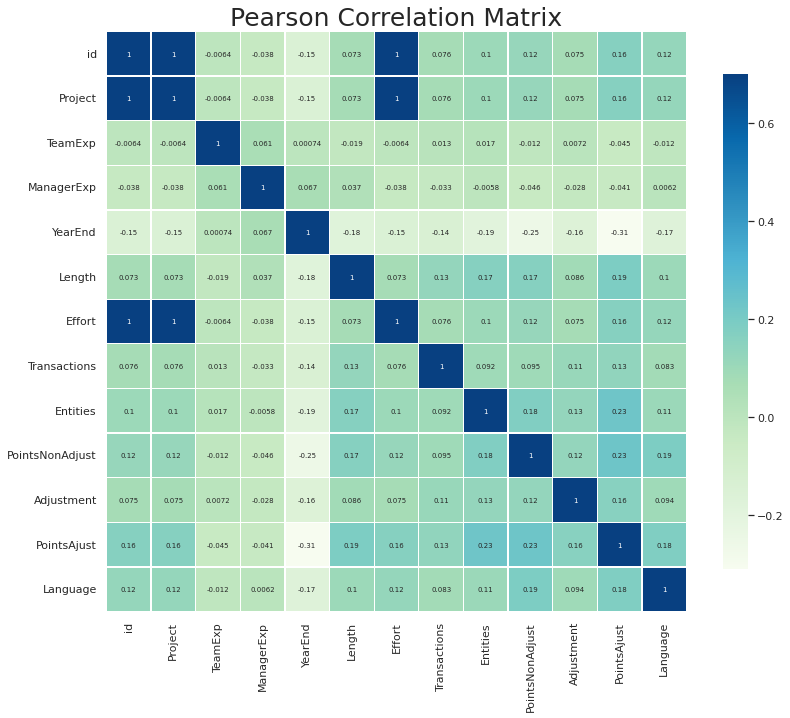

In [184]:
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(13,13))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":7}, cbar_kws={"shrink": .7})

### Check the distribution of numerical feature values across the samples inorder to know in advance how well does each feature correlate with Effort of Software development.

In [185]:
Effort_corr = df.corr()['Effort'].sort_values(ascending=False)
print(Effort_corr)

id                 1.000000
Project            1.000000
Effort             1.000000
PointsAjust        0.163654
Language           0.123013
PointsNonAdjust    0.116099
Entities           0.103283
Transactions       0.075684
Adjustment         0.074554
Length             0.073074
TeamExp           -0.006408
ManagerExp        -0.037991
YearEnd           -0.148487
Name: Effort, dtype: float64


We want to drop the following features. Because the id,Project,Yearend and Language may be droped since these attributes does not any add value for our analysis

In [186]:
df = df.drop('id', axis=1)
df = df.drop('Project',axis=1)
df = df.drop('YearEnd',axis=1)
df = df.drop('Language',axis=1)


### Display the highly correlated labels to the effort estimation.

In [187]:
print(df.columns.values)

['TeamExp' 'ManagerExp' 'Length' 'Effort' 'Transactions' 'Entities'
 'PointsNonAdjust' 'Adjustment' 'PointsAjust']


### **Dividing dataset into training and testing set**

In [188]:
# Features
X = df.drop('Effort',axis=1)

# Label
y = df['Effort']

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

### **Understanding the shape of the training and testing set**

In [189]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2000, 8)
(500, 8)
(2000,)
(500,)


### **Scaling dataset**

In [190]:
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.0
Min:  0.0


We estimate the number of neurons (units) from our features. Ex: X_train.shape (56, 8). The optimizer is asking how you want to perform this gradient descent. In this case we are using the Adam optimizer and the mean square error loss function.

The rectified linear activation function or ReLU is a non-linear function or piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero.

In [191]:
model = Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [192]:
print(model.optimizer.learning_rate)

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>


Epoch 1/200
50/50 [==============================] - 1s 10ms/step - loss: 16151519.0000 - val_loss: 15893494.0000
Epoch 2/200
50/50 [==============================] - 0s 4ms/step - loss: 15515838.0000 - val_loss: 13340649.0000
Epoch 3/200
50/50 [==============================] - 0s 3ms/step - loss: 5649512.5000 - val_loss: 756495.6875
Epoch 4/200
50/50 [==============================] - 0s 4ms/step - loss: 598987.0625 - val_loss: 576887.6875
Epoch 5/200
50/50 [==============================] - 0s 5ms/step - loss: 571536.1250 - val_loss: 575953.8750
Epoch 6/200
50/50 [==============================] - 0s 4ms/step - loss: 570788.3750 - val_loss: 575531.0625
Epoch 7/200
50/50 [==============================] - 0s 4ms/step - loss: 572420.6250 - val_loss: 572309.6250
Epoch 8/200
50/50 [==============================] - 0s 5ms/step - loss: 571677.8125 - val_loss: 570442.8125
Epoch 9/200
50/50 [==============================] - 0s 7ms/step - loss: 568871.5625 - val_loss: 569543.6250
Epoch 10/

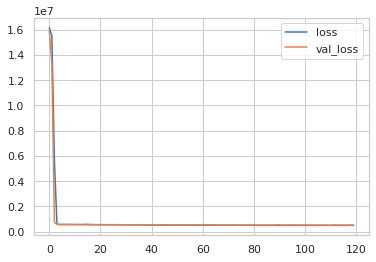

In [193]:
from keras.callbacks import EarlyStopping # Early Stopping Callback
K.set_value(model.optimizer.learning_rate,0.001)

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(X_train,y_train,validation_data=(X_test,y_test.values),
          batch_size=40,epochs=200, callbacks=[early_stop])
losses = pd.DataFrame(model.history.history)
losses.plot()

In [194]:
print("Weights and biases of the layers before training the model: \n")
for layer in model.layers:
  print(layer.name)
  print("Weights")
  print("Shape: ",layer.get_weights()[0].shape,'\n',layer.get_weights()[0])
  print("Bias")

Weights and biases of the layers before training the model: 

dense_26
Weights
Shape:  (8, 19) 
 [[-0.1552867  -0.14917845  0.35521203  0.03287741  0.34542382  0.11461341
  -0.5190022  -0.52005255  0.1316761  -0.40448555  0.16012414  0.07188771
  -0.374739   -0.03833347  0.26869956 -0.05702805  0.19806373 -0.13921383
  -0.08154632]
 [ 0.24659511  0.09155811 -0.3509697   0.05218638 -0.20996165  0.16169454
   0.13594031  0.28291982 -0.01542234 -0.15843362 -0.16136347  0.04558622
  -0.07139354 -0.06390271 -0.45658696 -0.0718734   0.3366446  -0.2188338
   0.32573286]
 [ 0.2684325  -0.30954444  0.28505948 -0.02673946 -0.31389135  0.40656537
   0.252877   -0.03403351  0.17791358 -0.06002969 -0.12334602  0.02763715
   0.42190328 -0.26514798 -0.0626992   0.03980156  0.50423217  0.38390753
   0.2667137 ]
 [ 0.25056097  0.04198552 -0.01756152 -0.18275072 -0.1769724   0.15677324
   0.19998547 -0.24828525  0.08556297 -0.13013679  0.31785682 -0.11340901
  -0.3122856  -0.13246235 -0.22698651  0.1242

In [195]:
ann_viz(model, title="My first neural network")

# We will display the model summary
The total number of parameters is just the sum of all weights and biases

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 19)                171       
                                                                 
 dense_27 (Dense)            (None, 20)                400       
                                                                 
 dense_28 (Dense)            (None, 19)                399       
                                                                 
 dense_29 (Dense)            (None, 19)                380       
                                                                 
 dense_30 (Dense)            (None, 19)                380       
                                                                 
 dense_31 (Dense)            (None, 19)                380       
                                                                 
 dense_32 (Dense)            (None, 19)               

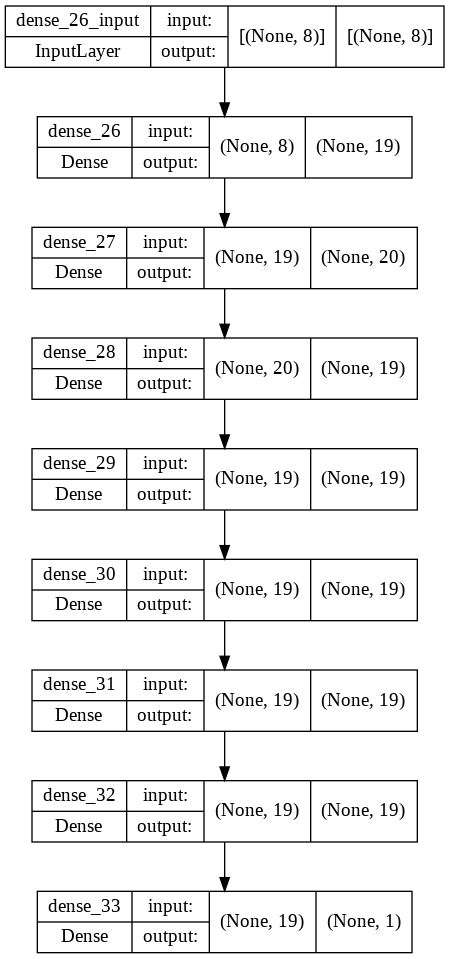

In [196]:
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

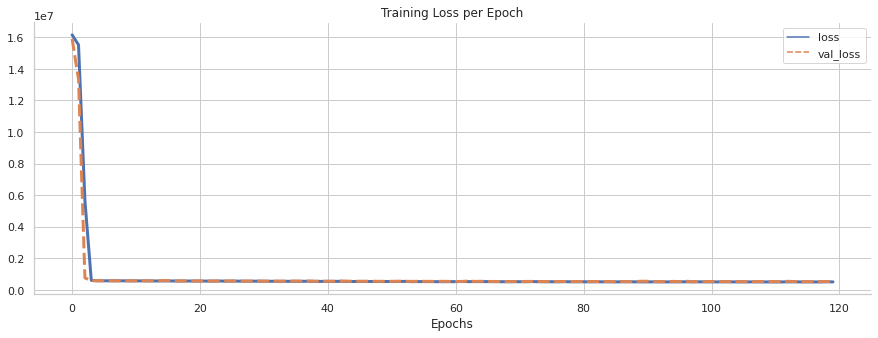

In [197]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

In [198]:
MMRE_list=[]
MdMRE_list=[]
Pred_list1= []
predictions = model.predict(X_test)
MRE=((np.absolute(y_test-predictions[1]))/y_test)
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<=0.35]
Pred=(P.size/MRE.size) * 100
MMRE_list.append(round(MMRE,2))
MdMRE_list.append(round(MdMRE,2))
Pred_list1.append(round(Pred,2))
print('Magnitude of Relative Error(MRE):',round(MRE,2).tolist())


Magnitude of Relative Error(MRE): [0.19, 0.43, 0.31, 0.08, 0.41, 0.31, 0.19, 0.09, 0.34, 0.07, 0.08, 0.17, 0.43, 0.37, 0.0, 0.1, 0.15, 0.04, 0.03, 0.13, 0.12, 0.47, 0.02, 0.09, 0.16, 0.08, 0.04, 0.12, 0.39, 0.16, 0.02, 0.14, 0.04, 0.1, 0.51, 0.51, 0.04, 0.08, 0.32, 0.05, 0.17, 0.27, 0.25, 0.17, 0.13, 0.14, 0.1, 0.04, 0.14, 0.06, 0.12, 0.19, 0.42, 0.13, 0.12, 0.0, 0.17, 0.2, 0.05, 0.03, 0.05, 0.1, 0.16, 0.15, 0.31, 0.24, 0.12, 0.01, 0.3, 0.05, 0.07, 0.34, 0.54, 0.25, 0.43, 0.5, 0.21, 0.02, 0.21, 0.07, 0.11, 0.1, 0.05, 0.45, 0.53, 0.03, 0.11, 0.39, 0.13, 0.18, 0.52, 0.11, 0.09, 0.32, 0.35, 0.05, 0.15, 0.1, 0.19, 0.52, 0.39, 0.03, 0.16, 0.04, 0.39, 0.28, 0.18, 0.46, 0.37, 0.45, 0.2, 0.01, 0.11, 0.14, 0.29, 0.06, 0.04, 0.1, 0.06, 0.12, 0.16, 0.14, 0.18, 0.11, 0.02, 0.45, 0.5, 0.01, 0.15, 0.46, 0.03, 0.51, 0.11, 0.12, 0.47, 0.37, 0.12, 0.06, 0.21, 0.16, 0.12, 0.14, 0.24, 0.13, 0.15, 0.16, 0.16, 0.38, 0.22, 0.14, 0.0, 0.36, 0.11, 0.17, 0.28, 0.06, 0.07, 0.4, 0.31, 0.32, 0.44, 0.44, 0.26, 0.3

In [199]:
Predicted_effort = [ item for elem in np. around(predictions).tolist() for item in elem]
Actual_effort= y_test.tolist()
print('Estimated Predictions for test samples:', Predicted_effort)
print('Actual Effort of test samples', Actual_effort)

Estimated Predictions for test samples: [4058.0, 4166.0, 4074.0, 3996.0, 4097.0, 4028.0, 4184.0, 4157.0, 4047.0, 4096.0, 3896.0, 4096.0, 4079.0, 3964.0, 4188.0, 4061.0, 4019.0, 3971.0, 4022.0, 3958.0, 4031.0, 4084.0, 4046.0, 4080.0, 4044.0, 4167.0, 3860.0, 4110.0, 3998.0, 4130.0, 4000.0, 4279.0, 3958.0, 4107.0, 3254.0, 3088.0, 4102.0, 3979.0, 4394.0, 3984.0, 4000.0, 4087.0, 4233.0, 3940.0, 4133.0, 3847.0, 4218.0, 4096.0, 4211.0, 4179.0, 4156.0, 4097.0, 4014.0, 4125.0, 4213.0, 4177.0, 4154.0, 3972.0, 3799.0, 4148.0, 3987.0, 4164.0, 4259.0, 4141.0, 3965.0, 3907.0, 3878.0, 3976.0, 4217.0, 4015.0, 3992.0, 4188.0, 3142.0, 4152.0, 4192.0, 3980.0, 4126.0, 3907.0, 4256.0, 4011.0, 4076.0, 3966.0, 4002.0, 4192.0, 3672.0, 4129.0, 4086.0, 3966.0, 3945.0, 4031.0, 3486.0, 4044.0, 4188.0, 4029.0, 3903.0, 4038.0, 4015.0, 4040.0, 4173.0, 3464.0, 4066.0, 3959.0, 4239.0, 4032.0, 4167.0, 4150.0, 3866.0, 4062.0, 4329.0, 4101.0, 3998.0, 4281.0, 4103.0, 3962.0, 3843.0, 4019.0, 4163.0, 3916.0, 3990.0, 3975.0,

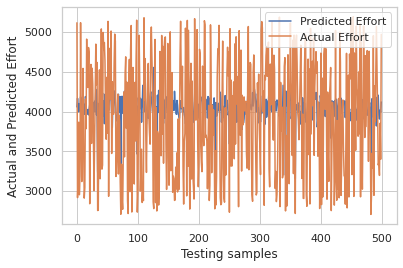

In [200]:
import matplotlib.pyplot as plt
for pr in Predicted_effort,Actual_effort:
     timefilteredForce = plt.plot(pr)
     timefilteredForce = plt.xlabel('Testing samples')
     timefilteredForce = plt.ylabel('Actual and Predicted Effort')
     plt.legend(['Predicted Effort', 'Actual Effort'], loc='upper right')
plt.show()

In [201]:
from prettytable import PrettyTable

x = PrettyTable(['Performance Evaluation Metrics', 'No.of Features', 'Obtained Results'])
 
x.add_row(['Mean Magnitude Relative Error (MMRE)', 8,MMRE_list])
x.add_row(['Median of Magnitude of Relative Errors(MdMRE)',['TeamExp', 'ManagerExp', 'Length', 'Transactions'], MdMRE_list])
x.add_row(['Overall Prediction Accuracy', ['Entities', 'PointsNonAdjust', 'Adjustment', 'PointsAjust'], Pred_list1])
print(x)

+-----------------------------------------------+--------------------------------------------------------------+------------------+
|         Performance Evaluation Metrics        |                        No.of Features                        | Obtained Results |
+-----------------------------------------------+--------------------------------------------------------------+------------------+
|      Mean Magnitude Relative Error (MMRE)     |                              8                               |      [0.19]      |
| Median of Magnitude of Relative Errors(MdMRE) |     ['TeamExp', 'ManagerExp', 'Length', 'Transactions']      |      [0.15]      |
|          Overall Prediction Accuracy          | ['Entities', 'PointsNonAdjust', 'Adjustment', 'PointsAjust'] |      [81.8]      |
+-----------------------------------------------+--------------------------------------------------------------+------------------+


# **EFFORT ESTIMATION USING RANDOM SAMPLE**

In [202]:
# fueatures of new house
SD_Effort= df.drop('Effort',axis=1).iloc[28]
print(f'The Software development effort estimation Attributes are:\n{SD_Effort}')
# reshape the numpy array and scale the features
SD_Effort = scaler.transform(SD_Effort.values.reshape(-1, 8))
# run the model and get the price prediction
print('\nThe Prediction of Software development Effort:',model.predict(SD_Effort)[0,0])
# original price
print('\nThe Original Software development Effort:',df.iloc[28]['Effort'])
diff=np.absolute(df.iloc[21]['Effort']-model.predict(SD_Effort)[0,0])
MRE=diff/df.iloc[21]['Effort']
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
print('Mean Magnitude Relative Error (MMRE)',MRE)
print('Median of Magnitude of Relative Errors(MdMRE)',MMRE)
print('Prediction Accuracy', round((diff/(df.iloc[21]['Effort']))*100))

The Software development effort estimation Attributes are:
TeamExp              4
ManagerExp           4
Length              16
Transactions       116
Entities           170
PointsNonAdjust    286
Adjustment          27
PointsAjust        263
Name: 28, dtype: int64

The Prediction of Software development Effort: 3478.389

The Original Software development Effort: 2728
Mean Magnitude Relative Error (MMRE) 0.27834947299361446
Median of Magnitude of Relative Errors(MdMRE) 0.27834947299361446
Prediction Accuracy 28


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


# **SECOND MODEL IMPLEMENTATION BY CONSIDERING ONLY 5 FEATURE**

In [203]:
df2 = pd.read_csv('/content/drive/MyDrive/fp.csv')

df2.head()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
0,1,1,1,4,85,12,5152,253,52,305,34,302,1
1,2,2,0,0,86,4,5635,197,124,321,33,315,1
2,3,3,4,4,85,1,805,40,60,100,18,83,1
3,4,4,0,0,86,5,3829,200,119,319,30,303,1
4,5,5,0,0,86,4,2149,140,94,234,24,208,1


In [204]:
df2=df2.drop('id',axis=1)
df2=df2.drop('Project',axis=1)
df2=df2.drop('TeamExp',axis=1)
df2=df2.drop('ManagerExp', axis=1)
df2=df2.drop('YearEnd', axis=1)
df2=df2.drop('Adjustment',axis=1)
df2=df2.drop('Language',axis=1)

In [205]:
df2=df2.drop('Entities',axis=1)

In [206]:
df2

,Length,Effort,Transactions,PointsNonAdjust,PointsAjust
0,12,5152,253,305,302
1,4,5635,197,321,315
2,1,805,40,100,83
3,5,3829,200,319,303
4,4,2149,140,234,208
...,...,...,...,...,...
87,9,5817,96,204,192
88,7,2989,116,188,156
89,6,3136,86,135,131
90,17,14434,221,342,342


In [207]:
# Features
X = df2.drop('Effort',axis=1)

# Label
y = df2['Effort']

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [208]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(64, 4)
(28, 4)
(64,)
(28,)


In [209]:
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.0
Min:  0.0


In [210]:
model = Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

Epoch 1/1000
2/2 [==============================] - 1s 180ms/step - loss: 42982440.0000 - val_loss: 64984108.0000
Epoch 2/1000
2/2 [==============================] - 0s 34ms/step - loss: 42982268.0000 - val_loss: 64983932.0000
Epoch 3/1000
2/2 [==============================] - 0s 34ms/step - loss: 42982096.0000 - val_loss: 64983744.0000
Epoch 4/1000
2/2 [==============================] - 0s 32ms/step - loss: 42981932.0000 - val_loss: 64983548.0000
Epoch 5/1000
2/2 [==============================] - 0s 34ms/step - loss: 42981744.0000 - val_loss: 64983316.0000
Epoch 6/1000
2/2 [==============================] - 0s 33ms/step - loss: 42981540.0000 - val_loss: 64983032.0000
Epoch 7/1000
2/2 [==============================] - 0s 38ms/step - loss: 42981304.0000 - val_loss: 64982696.0000
Epoch 8/1000
2/2 [==============================] - 0s 59ms/step - loss: 42981052.0000 - val_loss: 64982356.0000
Epoch 9/1000
2/2 [==============================] - 0s 30ms/step - loss: 42980768.0000 - val_lo

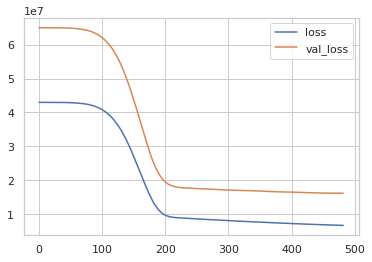

In [211]:
from keras.callbacks import EarlyStopping # Early Stopping Callback
K.set_value(model.optimizer.learning_rate,0.001)

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(X_train,y_train,validation_data=(X_test,y_test.values),
          batch_size=40,epochs=1000, callbacks=[early_stop])
losses = pd.DataFrame(model.history.history)
losses.plot()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 19)                95        
                                                                 
 dense_35 (Dense)            (None, 19)                380       
                                                                 
 dense_36 (Dense)            (None, 19)                380       
                                                                 
 dense_37 (Dense)            (None, 19)                380       
                                                                 
 dense_38 (Dense)            (None, 1)                 20        
                                                                 
Total params: 1,255
Trainable params: 1,255
Non-trainable params: 0
_________________________________________________________________


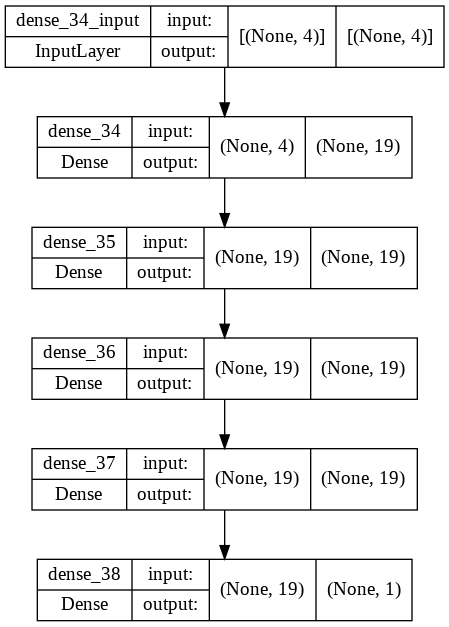

In [212]:
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [213]:
MMRE_list=[]
MdMRE_list=[]
Pred_list2= []
predictions = model.predict(X_test)
MRE=((np.absolute(y_test-predictions[1]))/y_test)
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<=0.35]
Pred=(P.size/MRE.size) * 100
MMRE_list.append(round(MMRE,2))
MdMRE_list.append(round(MdMRE,2))
Pred_list2.append(round(Pred,2))
print('Magnitude of Relative Error(MRE):',round(MRE,2).tolist())

Magnitude of Relative Error(MRE): [0.25, 0.45, 0.19, 0.02, 0.44, 0.19, 0.54, 4.25, 0.28, 0.46, 0.81, 0.71, 0.03, 0.34, 0.75, 0.17, 0.75, 0.18, 3.63, 0.11, 0.37, 0.81, 0.05, 0.59, 0.25, 0.65, 0.37, 0.37]


In [214]:
Predicted_effort = [ item for elem in np. around(predictions).tolist() for item in elem]
Actual_effort= y_test.tolist()
print('Estimated Predictions for test samples:', Predicted_effort)
print('Actual Effort of test samples', Actual_effort)

Estimated Predictions for test samples: [3542.0, 3729.0, 2959.0, 4511.0, 3847.0, 2959.0, 4772.0, 4018.0, 5735.0, 2585.0, 12100.0, 5437.0, 4650.0, 4532.0, 9056.0, 2920.0, 9056.0, 5516.0, 1656.0, 4266.0, 3630.0, 12100.0, 6651.0, 14536.0, 5535.0, 8054.0, 5921.0, 9660.0]
Actual Effort of test samples [2989, 2569, 3136, 3647, 2583, 3136, 2429, 710, 5180, 2548, 19894, 12824, 3829, 5635, 14987, 3192, 14987, 3164, 805, 4172, 2723, 19894, 3941, 2352, 4977, 10577, 5922, 5880]


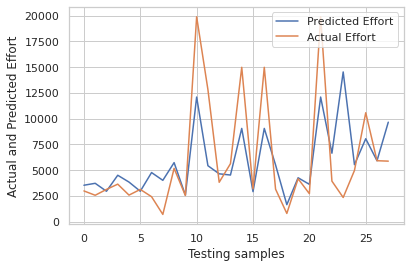

In [215]:
import matplotlib.pyplot as plt
for pr in Predicted_effort,Actual_effort:
     timefilteredForce = plt.plot(pr)
     timefilteredForce = plt.xlabel('Testing samples')
     timefilteredForce = plt.ylabel('Actual and Predicted Effort')
     plt.legend(['Predicted Effort', 'Actual Effort'], loc='upper right')
plt.show()

In [216]:
from prettytable import PrettyTable

x = PrettyTable(['Performance Evaluation Metrics', 'No.of Features', 'Obtained Results'])
x.add_row(['Mean Magnitude Relative Error (MMRE)', 5,MMRE_list])
x.add_row(['Median of Magnitude of Relative Errors(MdMRE)',['Length',	'Transactions', 'Entities'], MdMRE_list])
x.add_row(['Overall Prediction Accuracy', ['PointsNonAdjust',	'PointsAjust'], Pred_list2])
print(x)

+-----------------------------------------------+----------------------------------------+------------------+
|         Performance Evaluation Metrics        |             No.of Features             | Obtained Results |
+-----------------------------------------------+----------------------------------------+------------------+
|      Mean Magnitude Relative Error (MMRE)     |                   5                    |      [0.64]      |
| Median of Magnitude of Relative Errors(MdMRE) | ['Length', 'Transactions', 'Entities'] |      [0.37]      |
|          Overall Prediction Accuracy          |   ['PointsNonAdjust', 'PointsAjust']   |     [42.86]      |
+-----------------------------------------------+----------------------------------------+------------------+


# **MULTIPLE LINEAR REGRESSION MODEL**

In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [218]:
df2.to_csv('file1.csv')

In [219]:
df2

,Length,Effort,Transactions,PointsNonAdjust,PointsAjust
0,12,5152,253,305,302
1,4,5635,197,321,315
2,1,805,40,100,83
3,5,3829,200,319,303
4,4,2149,140,234,208
...,...,...,...,...,...
87,9,5817,96,204,192
88,7,2989,116,188,156
89,6,3136,86,135,131
90,17,14434,221,342,342


In [220]:
# Features
X = df2.drop('Effort',axis=1)

# Label
y = df2['Effort']

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [221]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(64, 4)
(28, 4)
(64,)
(28,)


In [222]:
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.0
Min:  0.0


In [223]:
x_traind=X_train
x_testd=X_test
y_traind=y_train
y_testd=y_test

In [224]:
def find_average_error(y_pred, y):
    absolute = np.absolute(y_pred - y)
    error = np.sum(absolute)
    average_error = (error*1.0)/len(absolute)
    return average_error

In [225]:
def FIND_MRE(y,y_pred):
    error= np.absolute((y-y_pred)*1.0)
    return error

In [226]:
def MLR(x_traind, x_testd, y_traind, y_testd, M):
    M_values = [1]
    train_errors = []
    test_errors = []
    train_MRE=[]
    test_MRE=[]

    ols = linear_model.LinearRegression()
    model = ols.fit(x_traind, y_traind)

    y_train_pred = model.predict(x_traind)
    train_errors.append(find_average_error(y_train_pred, y_train))
    
    y_test_pred = model.predict(x_testd)
    test_errors.append(find_average_error(y_test_pred, y_test))
    
    for i in range(25, M+1):
        M_values.append(i)
        x_train1 = x_traind**i
        x_test1 = x_testd**i
        
        x_train = np.column_stack(x_train, x_train1)
        x_test = np.column_stack(x_test, x_test1)
    
        model = ols.fit(x_train, y_train)
    
        y_train_pred = model.predict(x_train)
        train_MRE.append(FIND_MRE(y_train,y_train_pred))
        train_errors.append(find_average_error(y_train_pred, y_train))

        y_test_pred = model.predict(x_test)
        test_MRE.append(FIND_MRE(y_test,y_test_pred))
        test_errors.append(find_average_error(y_test_pred, y_test)) #MMRE

    
    return M_values, train_MRE,test_MRE,train_errors, test_errors,y_test_pred,y_test

In [227]:
#This is a function call for Multiple Linear Regression Model
M = 5
M_values, TR_MRE,TE_MRE,train_errors, test_errors,pred,test = MLR(X_train, X_test, y_train, y_test, M)

In [228]:
Predicted_effort = np. around(pred).tolist()
Actual_effort= test.tolist()
print('Estimated Predictions for test samples:', Predicted_effort)
print('Actual Effort of test samples', Actual_effort)

Estimated Predictions for test samples: [2370.0, 2909.0, 2138.0, 3145.0, 3187.0, 2138.0, 4709.0, 3224.0, 6263.0, 1506.0, 16100.0, 6508.0, 3861.0, 3871.0, 9420.0, 2432.0, 9420.0, 5892.0, 214.0, 3642.0, 2375.0, 16100.0, 6784.0, 14858.0, 4922.0, 8927.0, 4963.0, 11101.0]
Actual Effort of test samples [2989, 2569, 3136, 3647, 2583, 3136, 2429, 710, 5180, 2548, 19894, 12824, 3829, 5635, 14987, 3192, 14987, 3164, 805, 4172, 2723, 19894, 3941, 2352, 4977, 10577, 5922, 5880]


In [229]:
MMRE_list=[]
MdMRE_list=[]
Pred_list3= []
MRE=((np.absolute(test-pred))/test)
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<=0.35]
Pred=(P.size/MRE.size) * 100
MMRE_list.append(round(MMRE,2))
MdMRE_list.append(round(MdMRE,2))
Pred_list3.append(round(Pred,2))
print('Magnitude of Relative Error(MRE):',round(MRE,2).tolist())

Magnitude of Relative Error(MRE): [0.21, 0.13, 0.32, 0.14, 0.23, 0.32, 0.94, 3.54, 0.21, 0.41, 0.19, 0.49, 0.01, 0.31, 0.37, 0.24, 0.37, 0.86, 0.73, 0.13, 0.13, 0.19, 0.72, 5.32, 0.01, 0.16, 0.16, 0.89]


In [230]:
MdMRE

0.2754784871426783

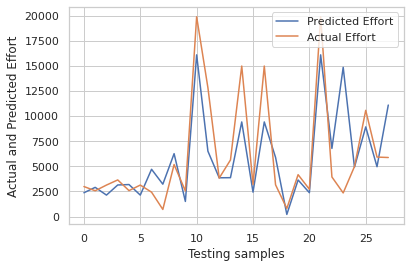

In [231]:
import matplotlib.pyplot as plt
for pr in Predicted_effort,Actual_effort:
     timefilteredForce = plt.plot(pr)
     timefilteredForce = plt.xlabel('Testing samples')
     timefilteredForce = plt.ylabel('Actual and Predicted Effort')
     plt.legend(['Predicted Effort', 'Actual Effort'], loc='upper right')
plt.show()

In [232]:
from prettytable import PrettyTable

x = PrettyTable(['Performance Evaluation Metrics', 'No.of Features', 'Obtained Results'])
x.add_row(['Mean Magnitude Relative Error (MMRE)', 5,MMRE_list])
x.add_row(['Median of Magnitude of Relative Errors(MdMRE)',['Length',	'Transactions', 'Entities'], MdMRE_list])
x.add_row(['Overall Prediction Accuracy', ['PointsNonAdjust',	'PointsAjust'], Pred_list3])
print(x)

+-----------------------------------------------+----------------------------------------+------------------+
|         Performance Evaluation Metrics        |             No.of Features             | Obtained Results |
+-----------------------------------------------+----------------------------------------+------------------+
|      Mean Magnitude Relative Error (MMRE)     |                   5                    |      [0.63]      |
| Median of Magnitude of Relative Errors(MdMRE) | ['Length', 'Transactions', 'Entities'] |      [0.28]      |
|          Overall Prediction Accuracy          |   ['PointsNonAdjust', 'PointsAjust']   |     [60.71]      |
+-----------------------------------------------+----------------------------------------+------------------+


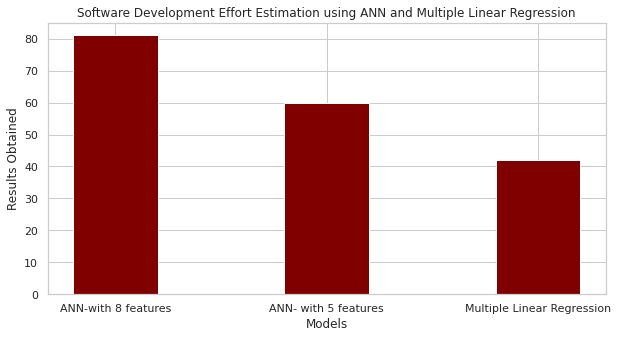

In [234]:
data = {'ANN-with 8 features':Pred_list1, 'ANN- with 5 features':Pred_list3, 'Multiple Linear Regression':Pred_list2}
for k, v in data.items():
    data[k] = int(v[0])
Models = data.keys()
values = data.values()

fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(Models, values, color ='maroon', width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Results Obtained")
plt.title("Software Development Effort Estimation using ANN and Multiple Linear Regression")
plt.show()

## **OLS====>Ordinary least squares regression is a way to find the line of best fit for a set of data.**
1.model.predict:Given a trained model, predict the label of a new set of data.